# Required Imports for This Notebook
- **Pandas**: Used for data handling, exploration, and manipulation.
- **Scikit-learn**: Provides tools for loading datasets and applying machine learning techniques.
- **Matplotlib**: Used for visualizing data with plots and charts.
- **Numpy**: Used for mathematical operations and calculations.
- **Seaborn**: A statistical data visualization library based on Matplotlib, used for creating informative and attractive visualizations.

In [74]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Task 1: Source the Data Set

## Importing the Iris Dataset
We will import the Iris dataset from the `sklearn.datasets` module using the `load_iris()` function.

### Understanding `load_iris()`
- The `load_iris()` function returns a dictionary-like object called a **Bunch**.
- The **Bunch** contains attributes that allow access to both the data and metadata of the dataset.
- The dataset consists of **numerical features** (sepal length, sepal width, petal length, petal width) and  **target classes** representing the species (setosa, versicolor, virginica).

## Resources
- [Scikit-learn datasets documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html).


In [75]:
# Load the iris dataset
iris_dataset = datasets.load_iris()

# Task 2: Explore the Data Structure

In this task, we examined the structure of the Iris dataset by performing the following steps:

- **Printed the shape of the dataset** to determine the number of samples (rows) and features (columns).
- **Displayed the first 5 rows** to get an initial view of the data.
- **Displayed the last 5 rows** to check the end of the dataset.
- **Listed the feature names** to understand the measured attributes (sepal and petal dimensions).
- **Listed the target class names** to identify the species classifications.

## Resources
- [Pandas dataframe documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

In [76]:
# Convert the dataset into a Pandas DataFrame
iris_dataframe = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)

# Add the target column to the DataFrame
iris_dataframe["target"] = iris_dataset.target

# 1. Print the shape of the dataset
print("Shape of the dataset:", iris_dataframe.shape)

# 2. Print the first 5 rows of the dataset
print("First 5 rows of the dataset:")
display(iris_dataframe.head())  # Use display() in Jupyter for better formatting

# 3. Print the last 5 rows of the dataset
print("Last 5 rows of the dataset:")
display(iris_dataframe.tail())

# 4. Print the feature names (column names)
print("Feature Names:", iris_dataset.feature_names)

# 5. Print the target class names (species)
print("Target Classes:", iris_dataset.target_names)

Shape of the dataset: (150, 5)
First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Last 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Classes: ['setosa' 'versicolor' 'virginica']


# Task 3: Summarize the Data
For each feature calculating key statistical metrics (mean, min, max, standard deviation, and median) for the `iris_dataframe` and stores them in a new DataFrame.  
It then applies styling to align the table content and headers to the left before displaying the formatted table.

## Resources
[Pandas dataframes stats](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)

In [77]:
# Create a DataFrame to store statistics
iris_stats_dataframe = pd.DataFrame({
    "Mean": iris_dataframe.mean(),
    "Minimum": iris_dataframe.min(),
    "Maximum": iris_dataframe.max(),
    "Standard Deviation": iris_dataframe.std(),
    "Median": iris_dataframe.median()
})

## Apply table styling to align text to the left
feature_stats_styled = iris_stats_dataframe.style.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'left')]},  # Align column headers to the left
    {'selector': 'td', 'props': [('text-align', 'left')]}   # Align table content to the left
])
# Display the statistics in a well-formatted table
display(feature_stats_styled)

,Mean,Minimum,Maximum,Standard Deviation,Median
sepal length (cm),5.843333,4.300000,7.900000,0.828066,5.800000
sepal width (cm),3.057333,2.000000,4.400000,0.435866,3.000000
petal length (cm),3.758000,1.000000,6.900000,1.765298,4.350000
petal width (cm),1.199333,0.100000,2.500000,0.762238,1.300000
target,1.000000,0.000000,2.000000,0.819232,1.000000


# Task 4: Visualize Features

This code plots histograms for the four features of `iris_dataframe` in a 2×2 grid, setting the figure size to 12×8 inches.  
Each histogram has 20 bins, black edges, and 70% opacity, with the feature name as the title, the feature name as the x-axis label, and "Frequency" as the y-axis label.  
The layout is adjusted to prevent overlapping.

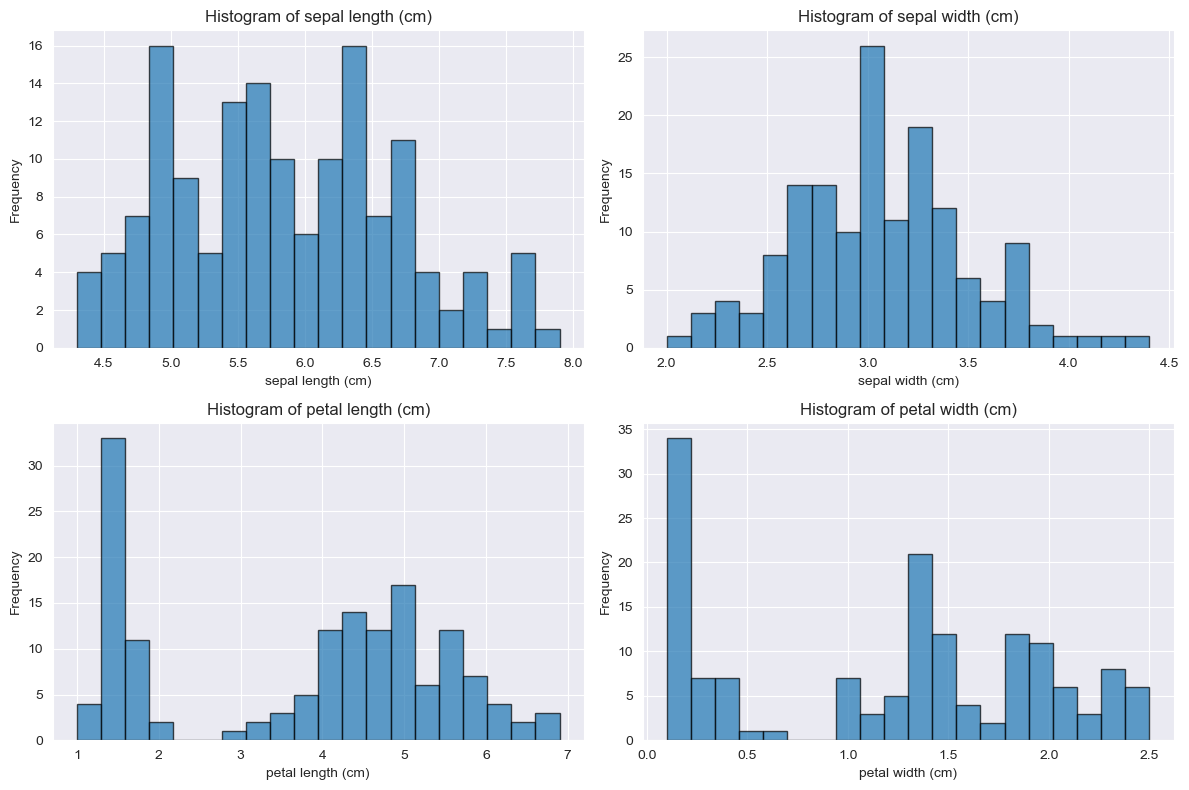

In [78]:
# Set figure size
plt.figure(figsize=(12, 8))

# Iterate through each column in the DataFrame
for i, column in enumerate(iris_dataframe.columns[:4], 1):
    # Create subplots
    plt.subplot(2, 2, i)
    # Histogram with 20 bins, black edges, and 70% opacity.
    plt.hist(iris_dataframe[column], bins=20, edgecolor="black", alpha=0.7)
    # Title
    plt.title(f"Histogram of {column}")
    # X-axis label
    plt.xlabel(column)
    # Y-axis label
    plt.ylabel("Frequency")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# Task 5: Investigate Relationships
This code creates a scatter plot of sepal length vs. sepal width, color-coding points by species.  
It iterates through the three species, filtering the dataset, and plots each species separately with a unique color.  
The plot shows the relationship between Sepal Length and Sepal Width for three Iris species (setosa, versicolor, virginica), highlighting distinct clustering patterns with some overlap between versicolor and virginica.

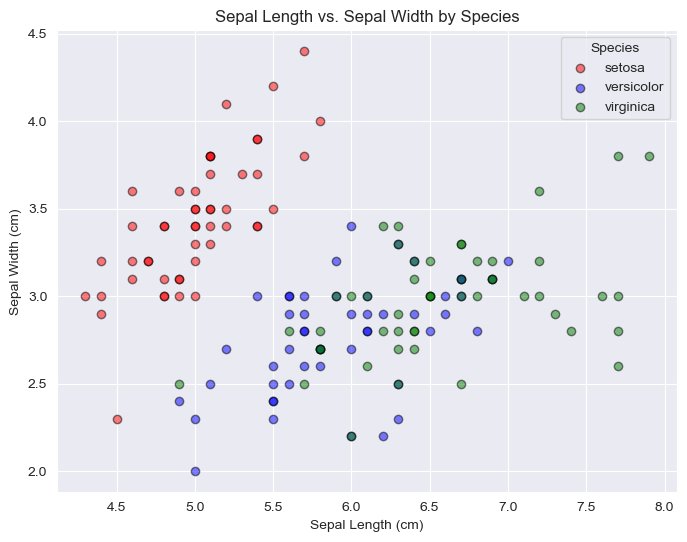

In [79]:
# Define colors for each species
iris_classes = {0: 'red', 1: 'blue', 2: 'green'}

# Scatter plot for Sepal Length vs. Sepal Width
plt.figure(figsize=(8, 6))

# Plot each species separately
for species, color in iris_classes.items():
    subset = iris_dataframe[iris_dataframe['target'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'],
            label=iris_dataset.target_names[species],
            color=color, alpha=0.5, edgecolors='black', marker='o')


# Labels and title
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs. Sepal Width by Species")
plt.legend(title="Species")

# Show plot
plt.show()

## Task 6: Analyze Relationship
Using `numpy.polyfit` to add a regression line to the scatter plot from Task 5.  

### Results and Analysis
The plot shows a linear regression line (y = -0.06x + 3.42) fitted to the relationship between Sepal Length and Sepal Width for three Iris species.
The slope of the line is negative, indicating a slight decrease in Sepal Width as Sepal Length increases.
The regression line is not a perfect fit for the data, as there is considerable scatter around the line. 
The \$R^2\$ value is low (0.0138), indicating a weak relationship between the two variables (see Task 9 for details).

## Resources
[Numpy polyfit documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)  

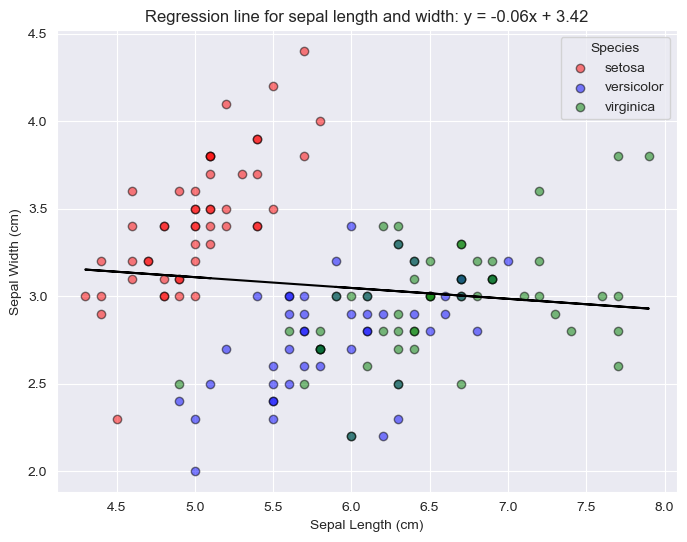

In [80]:
# From task 5: Scatter plot for Sepal Length vs. Sepal Width with regression line
iris_classes = {0: 'red', 1: 'blue', 2: 'green'}

# Scatter plot for Sepal Length vs. Sepal Width
plt.figure(figsize=(8, 6))

# Plot each species separately
for species, color in iris_classes.items():
    subset = iris_dataframe[iris_dataframe['target'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'],
            label=iris_dataset.target_names[species],
            color=color, alpha=0.5, edgecolors='black', marker='o')

# Labels and title
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Species")

# From task 6: Add regression line
sepal_length= iris_dataframe['sepal length (cm)']
sepal_width = iris_dataframe['sepal width (cm)']
m, c = np.polyfit(sepal_length, sepal_width, 1)
f =  m * sepal_length + c
plt.plot(sepal_length, f , color='black')
plt.title(f'Regression line for sepal length and width: y = {m:.2f}x + {c:.2f}')
plt.show()


## Task 7: Analyze Class Distributions
Box-plots of the petal lengths for each of the three classes.  
Grouping the DataFrame by target and extract petal length values.  
The analysis suggests significant differences in petal length between species, with virginica having the longest petals, followed by versicolor, and setosa having the shortest.
## Resources
[Pandas Dataframe groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)  
[Pandas Dataframe boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

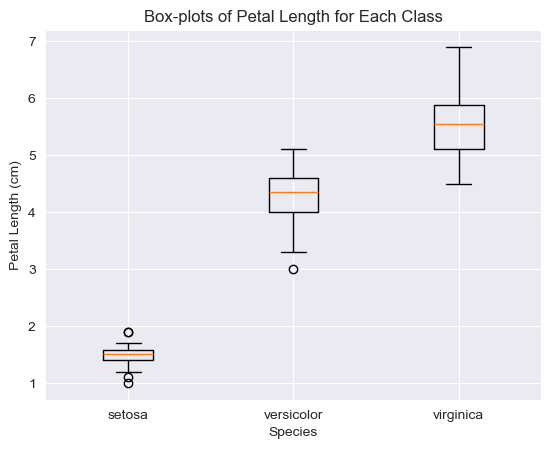

In [81]:
# Box-plots for petal length for each class
fig, axes = plt.subplots()

# Prepare data for box plots using groupby
data = [group['petal length (cm)'].values for name, group in iris_dataframe.groupby('target')]

# Create box plots
axes.boxplot(data, tick_labels= iris_dataset.target_names)

# Add title and labels
plt.title("Box-plots of Petal Length for Each Class")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")

# Show plot
plt.show()

## Task 8: Compute Correlations
Calculating the correlation coefficients between the features.  
Displaying the results as a heatmap using matplotlib.

### Results And Analysis
- **Strong Positive Correlations**: Petal Length & Petal Width. 
- **Moderate Positive Correlations**: Sepal Length with Petal Length and Petal Width.  
- **Negative Correlations**: Sepal Width with all other features (weakly negative).  
- **Color Scale**: Dark red = High positive correlation, Dark blue = Negative correlation.  

## Resources
[Matplot heatmap documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html)  
[Pandas Dataframe corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)  
[Pandas Dataframe drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

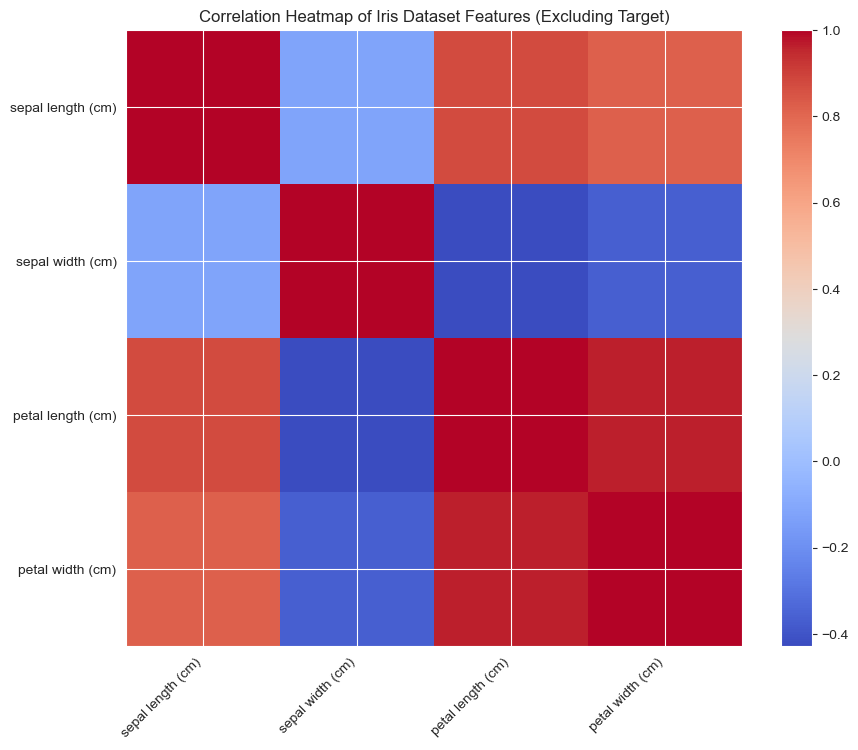

In [82]:
## Calculate the correlation matrix excluding the target column
correlation_matrix = iris_dataframe.drop(columns=['target']).corr()

# Set up the matplotlib figure and axes
heatmap_fig, axes = plt.subplots(figsize=(10, 8))

# Create a heatmap using Matplotlib
# The cmap parameter specifies the colormap for the heatmap, with 'coolwarm' transitioning from blue to red. 
# The interpolation parameter, set to 'nearest', ensures no interpolation. This results in a blocky appearance where each block represents a single value.
cax = axes.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
heatmap_fig.colorbar(cax)

# Add labels
axes.set_xticks(np.arange(len(correlation_matrix.columns)))
axes.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
axes.set_yticks(np.arange(len(correlation_matrix.columns)))
axes.set_yticklabels(correlation_matrix.columns)

# Add title
axes.set_title("Correlation Heatmap of Iris Dataset Features (Excluding Target)")

# Show plot
plt.show()

## Task 9: Fit a Simple Linear Regression
From task 5 and task 6: Fitting a simple linear regression line to the scatter plot of Sepal Length vs. Sepal Width.  
The $R^2$ value is calculated to assess the goodness of fit of the regression line.  
The calculation is done by hand using the sum of squares of residuals and the total sum of squares.
### Results and Analysis
The line is fitted to the data points, but the $R^2$ is very small (0.0138) , indicating a weak relationship.
### Resources
[Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

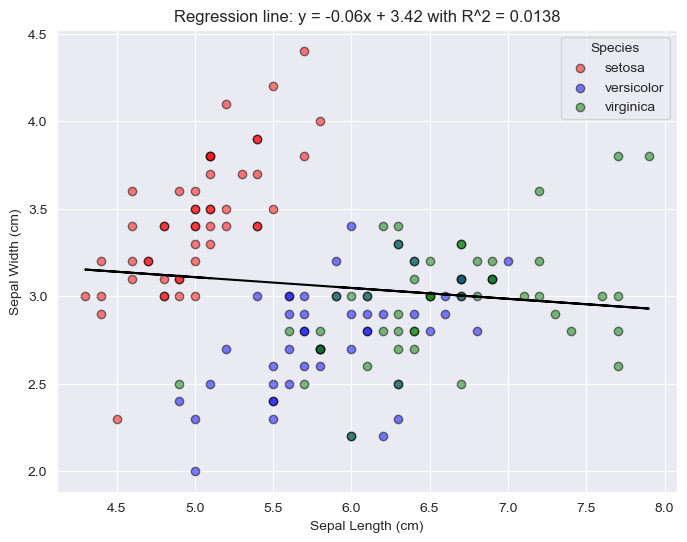

In [83]:
# From task 5: Scatter plot for Sepal Length vs. Sepal Width with regression line
iris_classes = {0: 'red', 1: 'blue', 2: 'green'}

# Scatter plot for Sepal Length vs. Sepal Width
plt.figure(figsize=(8, 6))

# Plot each species separately
for species, color in iris_classes.items():
    subset = iris_dataframe[iris_dataframe['target'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'],
            label=iris_dataset.target_names[species],
            color=color, alpha=0.5, edgecolors='black', marker='o')

# Labels and title
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Species")

# From task 6: Add regression line
sepal_length= iris_dataframe['sepal length (cm)']
sepal_width = iris_dataframe['sepal width (cm)']
m, c = np.polyfit(sepal_length, sepal_width, 1)
f =  m * sepal_length + c
plt.plot(sepal_length, f , color='black')

# Calculating correlation by hand
# Sum of squares of residuals
ss_res = np.sum((sepal_width - f) ** 2)
# Mean of sepal width
y_bar = np.mean(sepal_width)
# Total sum of squares.
ss_tot = np.sum((sepal_width - y_bar) ** 2)

# R^2 value
r_2 = 1 - (ss_res / ss_tot)

plt.title(f'Regression line: y = {m:.2f}x + {c:.2f} with R^2 = {r_2:.4f}')
plt.show()

## Task 10: Too Many Features
Using seaborn to create a pairplot of the data set.  
The pairplot function generates scatter plots for each pair of features and histograms for each feature on the diagonal.
### Results and Analysis
- Setosa (Red): Clearly separable from others, especially using petal-related features.  
- Versicolor (Green) vs. Virginica (Blue): Significant overlap, particularly in sepal-related features. Petal length and width offer better separation.  
- Feature Correlations: Strong positive correlation between petal length and width. Sepal width is least useful for classification.
- The histograms confirm that petal features are the most useful for classification, with Setosa easily separable and Versicolor/Virginica having moderate overlap.

### Resources
[Seaborn pairplot documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

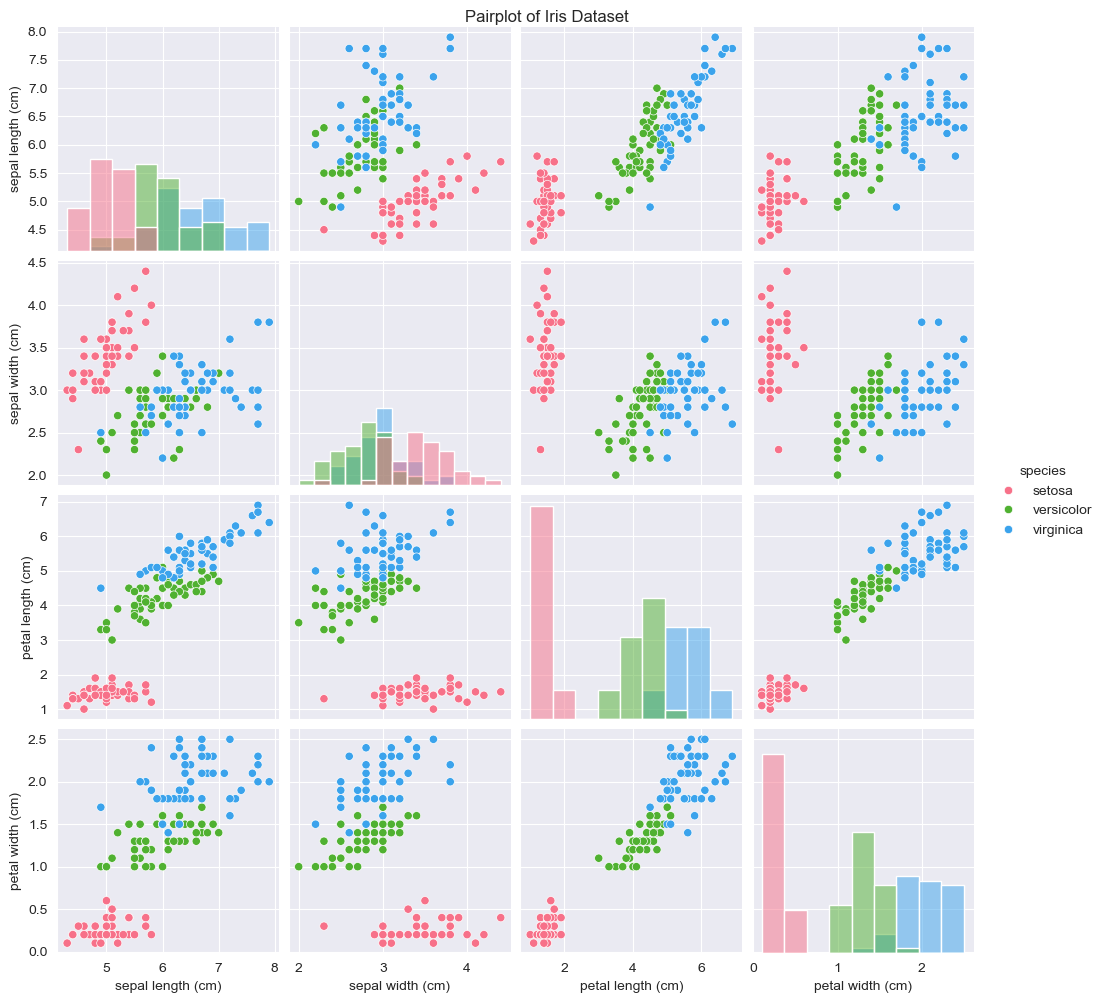

In [84]:
# Rename the 'target' column to 'species'
iris_dataframe = iris_dataframe.rename(columns={'target': 'species'})

# Map target values to class names
iris_dataframe['species'] = iris_dataframe['species'].map({i: name for i, name in enumerate(iris_dataset.target_names)})

# Create a pairplot of the iris dataset with class names in the legend
pairplot = sns.pairplot(iris_dataframe, hue='species', diag_kind='hist', palette='husl')

# Add a title to the pairplot
pairplot.fig.suptitle("Pairplot of Iris Dataset", y=1)

# Show the plot
plt.show()

## Summary and Conclusion
In this notebook, we explored the classic Iris dataset using Python's data science libraries.  
We performed the following tasks:  
1. Sourced the dataset: Loaded the Iris dataset using sklearn.datasets.
2. Explored the data structure: Examined the shape, first and last rows, feature names, and target class names.
3. Summarized the data: Calculated key statistical metrics (mean, min, max, standard deviation, and median) for each feature.
4. Visualized features: Created histograms for each feature to understand their distributions.
5. Investigated relationships: Plotted scatter plots to visualize the relationship between Sepal Length and Sepal Width, color-coded by species.
6. Analyzed relationships: Added a regression line to the scatter plot and calculated the $R^2$ value to assess the goodness of fit.
7. Analyzed class distributions: Created box plots to visualize the distribution of petal lengths for each species.
8. Computed correlations: Calculated the correlation coefficients between features and visualized them using a heatmap.
9. Fitted a simple linear regression: Fitted a regression line to the scatter plot and calculated the $R^2$ value.
10. Visualized pairwise relationships: Used Seaborn's pairplot to visualize pairwise relationships and distributions of features, color-coded by species.  

### Key Findings
- Feature Distributions: Petal features are more informative for classification than sepal features.
- Species Separation: Setosa is easily separable from the other two species, while Versicolor and Virginica show significant overlap.
- Correlation Analysis: Strong positive correlation between petal length and width, while sepal width has weak correlations with other features.
- Regression Analysis: The regression line fitted to Sepal Length vs. Sepal Width shows a weak relationship, as indicated by the low $R^2$ value.
- Pairplot Analysis: The pairplot confirms the findings from the scatter plots and box plots, highlighting the separability of Setosa and the overlap between Versicolor and Virginica.
- Feature Importance: Petal length and width are the most important features for distinguishing between species, while sepal width is the least useful.

## List of resources
1. [Scikit-learn datasets documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)  
2. [Pandas dataframe documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)  
3. [Pandas dataframes stats](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)  
4. [Numpy polyfit documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)  
5. [Pandas DataFrame groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)  
6. [Pandas DataFrame boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)  
7. [Matplotlib heatmap documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html)  
8. [Pandas DataFrame corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)  
9. [Pandas DataFrame drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)  
10. [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)  
11. [Seaborn pairplot documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html)  


 ### Future Work

As a next step, it would be useful to apply methods for predicting the species of flowers.

For reference, **k-NN** and **Decision Trees** have already shown strong performance in preliminary tests:  
1. [Avuluri Venkatasaireddy’s article on Medium](https://medium.com/@avulurivenkatasaireddy/k-nearest-neighbors-and-implementation-on-iris-data-set-f5817dd33711) demonstrates the use of the k-NN algorithm with Scikit-Learn.  
2. [Wei-Lung Wang’s article on Medium](https://medium.com/@wl8380/understanding-decision-trees-with-the-iris-dataset-6c12d3b1b09d) shows how Decision Trees can be used to classify flowers using simple rules.

Both methods gave similar accuracy, but Decision Trees have an extra advantage—they're easier to understand, quicker to make predictions, and show exactly how the decision was made in a way that's easy to follow.